Nous essayons de présenter le réseau de la SNCF afin de nous donner une vue d'ensemble.

Nous nous focialiserons sur :
* les diférentes stations de la SNCF en **Ile-de-France** (cartographie);
* la fréquentation des différentes stations (surtout les plus fréquentées et les moins fréquentées).

## Gares de voyageurs de la SNCF

### Récupération des données sur les gares de la SNCF

Nous utilisons l'API fourni par la plateforme open data de la SNCF pour récupérer l'ensemble des données sur les gares de voyageurs de la SNCF en France.

Nous les importons sous format **json**.

In [9]:
import requests as rq
import pandas as pd
import geopandas as gpd

In [14]:
url_gares = "https://ressources.data.sncf.com/api/v2/catalog/datasets/referentiel-gares-voyageurs/exports " + "/json " + "?limit=-1 "+ "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis"
dataGares = rq.get(url_gares)
dataGares = dataGares.json() 


In [15]:
dataGares = pd.json_normalize(dataGares)

Il faut ensuite les mettre au format DataFrame compatible avec *geopandas* pour les manipulations.

In [ ]:
dataGares = gpd.GeoDataFrame(dataGares)

In [16]:
dataGares.head()

,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,wgs_84
0,00001-1,00001,0087988717,None,Lycée Henri Sellier,93190,046,Livry-Gargan,93,Seine-Saint-Denis,...,False,DGIF,REGION DE PARIS-EST,None,LIVRY GARGAN GARE LYCEE HENRI SELLIER TR,1,LHS,2.515040,48.916460,NaN
1,00007-1,00007,0087784876,None,Bourg-Madame,66760,025,Bourg-Madame,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BOURG MADAME GARE,1,BMD,1.948670,42.432407,NaN
2,00013-1,00013,0087784819,None,Font-Romeu-Odeillo-Via,66120,124,Font-Romeu-Odeillo-Via,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,FONT ROMEU ODEILLO VIA GARE,1,FRM,2.038392,42.491232,NaN
3,00019-1,00019,0087784751,None,Thuès Carença,66360,209,Thuès-Entre-Valls,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,None,1,THG,2.222728,42.522949,NaN
4,00025-1,00025,0087784686,None,Villefranche - Vernet-les-Bains,66820,223,Villefranche-de-Conflent,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,VILLEFRANCHE VERNET LES BAINS GARE,1,VVB,2.370396,42.591998,NaN


## Focus sur la fréquentation des stations voyageurs

### Récupération des données de fréquentation des gares

Ce jeu de données représente la fréquentation annuelle de l'ensemble des 3000 gares voyageurs de 2015 à 2021.

Ces informations sont issues d’une part, des données de billetterie pour le trafic national et régional hors Ile-de-France et d’autre part, d’une extrapolation pour le trafic régional Ile-de-France à partir des comptages effectués tous les 3 à 4 ans et publiés par ailleurs en Open Data.

A noter, pour les années 2020 et 2021 peu de comptages ont été réalisés pour le trafic régional Ile-de-France en raison de la crise sanitaire. La fréquentation a été calculée en relatif par rapport aux évolutions des validations en gare observées depuis 2019.

***Informations du site open data de la [SNCF](https://ressources.data.sncf.com/explore/dataset/frequentation-gares/information/?disjunctive.nom_gare&disjunctive.code_postal&sort=nom_gare)***

Nous essayons de présenter le réseau de la SNCF afin de nous donner une vue d'ensemble.

Nous nous focialiserons sur :
* les diférentes stations de la SNCF en **Ile-de-France** (cartographie);
* la fréquentation des différentes stations (surtout les plus fréquentées et les moins fréquentées).

`Nous exécutons le code suivant afin de pouvoir visualiser tous les rendus de chaque cellule du notebook` 

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Gares de voyageurs de la SNCF

### Récupération des données sur les gares de la SNCF

Nous utilisons l'API fourni par la plateforme open data de la SNCF pour récupérer l'ensemble des données sur les gares de voyageurs de la SNCF en France.

Nous les importons sous format **json**.

In [ ]:
import requests as rq
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
url_gares = "https://ressources.data.sncf.com/api/v2/catalog/datasets/referentiel-gares-voyageurs/exports" + "/json" + "?limit=-1"+ "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis"
dataGares = rq.get(url_gares)
dataGares = dataGares.json() 
dataGares = pd.json_normalize(dataGares)

In [ ]:
dataGares.to_csv("D:/Documents/ENSAE-PARIS/2AD/Python-DataScience/Projet_Python_SNCF/gares_voyageurs.csv")

In [ ]:
dataGares.head()

,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,wgs_84.lon,wgs_84.lat,wgs_84
0,00001-1,00001,0087988717,None,Lycée Henri Sellier,93190,046,Livry-Gargan,93,Seine-Saint-Denis,...,False,DGIF,REGION DE PARIS-EST,None,LIVRY GARGAN GARE LYCEE HENRI SELLIER TR,1,LHS,2.515040,48.916460,NaN
1,00007-1,00007,0087784876,None,Bourg-Madame,66760,025,Bourg-Madame,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BOURG MADAME GARE,1,BMD,1.948670,42.432407,NaN
2,00013-1,00013,0087784819,None,Font-Romeu-Odeillo-Via,66120,124,Font-Romeu-Odeillo-Via,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,FONT ROMEU ODEILLO VIA GARE,1,FRM,2.038392,42.491232,NaN
3,00019-1,00019,0087784751,None,Thuès Carença,66360,209,Thuès-Entre-Valls,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,None,1,THG,2.222728,42.522949,NaN
4,00025-1,00025,0087784686,None,Villefranche - Vernet-les-Bains,66820,223,Villefranche-de-Conflent,66,Pyrénées-Orientales,...,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,VILLEFRANCHE VERNET LES BAINS GARE,1,VVB,2.370396,42.591998,NaN


In [ ]:
dataGares.columns

Index(['code', 'code_gare', 'uic_code', 'dtfinval',
       'alias_libelle_noncontraint', 'adresse_cp', 'commune_code',
       'commune_libellemin', 'departement_numero', 'departement_libellemin',
       'longitude_entreeprincipale_wgs84', 'latitude_entreeprincipale_wgs84',
       'segmentdrg_libelle', 'niveauservice_libelle', 'rg_libelle', 'tvss',
       'sops', 'gare', 'gare_alias_libelle_noncontraint',
       'gare_alias_libelle_fronton', 'gare_drg_on', 'gare_etrangere_on',
       'gare_agencegc_libelle', 'gare_regionsncf_libelle', 'gare_ug_libelle',
       'gare_ut_libelle', 'gare_nbpltf', 'tvs', 'wgs_84.lon', 'wgs_84.lat',
       'wgs_84'],
      dtype='object')

Il faut ensuite les mettre au format DataFrame compatible avec *geopandas* pour les manipulations. Ici, les coordonnées spaiales (**longitude** et **latitude**) de chaque station sont mises dans deux différentes columns. Nous les regroupons sous la variable **geometry** et on coserve à cette étape le système de projection **WGS84**.

In [ ]:
dataGares = gpd.GeoDataFrame(dataGares, geometry = gpd.points_from_xy(dataGares["wgs_84.lon"], dataGares["wgs_84.lat"]), crs= 4326)

In [ ]:
dataGares = dataGares.drop(columns={"wgs_84.lon", "wgs_84.lat", "wgs_84"})

In [ ]:
dataGares.head()
dataGares.tail()

,code,code_gare,uic_code,dtfinval,alias_libelle_noncontraint,adresse_cp,commune_code,commune_libellemin,departement_numero,departement_libellemin,...,gare_alias_libelle_fronton,gare_drg_on,gare_etrangere_on,gare_agencegc_libelle,gare_regionsncf_libelle,gare_ug_libelle,gare_ut_libelle,gare_nbpltf,tvs,geometry
3206,03207-1,03207,0087613885,2012-01-01,Villeneuve-d'Aveyron,None,None,None,None,None,...,Villeneuve-d'Aveyron,True,False,None,None,None,None,1,None,POINT EMPTY
3207,03211-1,03211,0087672766,None,Sarrance,64490,506,Sarrance,64,Pyrénées-Atlantiques,...,None,True,False,DRG Nlle Aquitaine,None,UG Aquitaine,None,1,None,POINT (-0.59996 43.04960)
3208,03215-1,03215,0087697359,None,Le Bourget T11,93350,013,Bourget,93,Seine-Saint-Denis,...,Le Bourget T11,True,False,DGIF,None,None,None,1,None,POINT (2.42316 48.93076)
3209,05256-1,05256,0087764571,None,Bagnols-sur-Cèze,30200,028,Bagnols-sur-Cèze,30,Gard,...,None,True,False,DRG Occitanie Sud,None,UG Est Occitanie,None,1,None,POINT EMPTY
3210,05257-1,05257,0087764555,None,Pont-Saint-Esprit,30130,202,Pont-Saint-Esprit,30,Gard,...,None,True,False,DRG Occitanie Sud,None,UG Est Occitanie,None,1,None,POINT EMPTY


In [ ]:
len(dataGares.columns)
dataGares.columns

Index(['code', 'code_gare', 'uic_code', 'dtfinval',
       'alias_libelle_noncontraint', 'adresse_cp', 'commune_code',
       'commune_libellemin', 'departement_numero', 'departement_libellemin',
       'longitude_entreeprincipale_wgs84', 'latitude_entreeprincipale_wgs84',
       'segmentdrg_libelle', 'niveauservice_libelle', 'rg_libelle', 'tvss',
       'sops', 'gare', 'gare_alias_libelle_noncontraint',
       'gare_alias_libelle_fronton', 'gare_drg_on', 'gare_etrangere_on',
       'gare_agencegc_libelle', 'gare_regionsncf_libelle', 'gare_ug_libelle',
       'gare_ut_libelle', 'gare_nbpltf', 'tvs', 'geometry'],
      dtype='object')

Le jeu de données compte désormais 29 variables décrivant chaque gare voyageur. 

Globalement dans notre travail, on s'intéressera aux variables suivantes : 
* **code_gare** : identifiant unique de chaque gare ;
* **dtfinval** : La date de fin de validité de la plateforme ;
* **adresse_cp** : Le code INSEE de a commune de localisation de la gare ;
* **alias_libelle_noncontraint** : le nom de la gare ;
* **departement_numero** : code INSEE du département de localisation de la gare ;
* **gare_etrangere_on** : prend `True` si la gre est située à l'étranger et `False` sinon ;
* **geometry** : coordonnées spatiales de la gare .

In [ ]:
dataGares.shape
dataGares[dataGares["gare_etrangere_on"] == "False"]["adresse_cp"].shape #nombre de communes françaises

(3211,)

Au total, 3211 gares de voyageurs sont répertoriées dans ce jeu de données et toutes sont situées sur le territoire français.

On garde uniquement les gares dont la plateforme est toujours valide et la variables d'intérêt sus-citées.

Mais avant remplaçons les `None` présents dans le jeu de données par `NaN`.

In [ ]:
dataGares.fillna(value= np.nan, inplace=True)

In [ ]:
dataGares["dtfinval"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3206    2012-01-01
3207           NaN
3208           NaN
3209           NaN
3210           NaN
Name: dtfinval, Length: 3211, dtype: object

In [ ]:
dataGares = dataGares[dataGares["dtfinval"].isnull()] # retrait des gares ayant une date de fin de validité
dataGaresV = dataGares[["code_gare", "dtfinval", "adresse_cp", "alias_libelle_noncontraint", "departement_numero", "gare_etrangere_on", "geometry"]]
dataGaresV.shape

(2883, 7)

Il nous reste à présent **2883** gares de voyageurs encore valides.

In [ ]:
dataGaresV.head()
dataGaresV.tail()

,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,geometry
0,00001,NaN,93190,Lycée Henri Sellier,93,False,POINT (2.51504 48.91646)
1,00007,NaN,66760,Bourg-Madame,66,False,POINT (1.94867 42.43241)
2,00013,NaN,66120,Font-Romeu-Odeillo-Via,66,False,POINT (2.03839 42.49123)
3,00019,NaN,66360,Thuès Carença,66,False,POINT (2.22273 42.52295)
4,00025,NaN,66820,Villefranche - Vernet-les-Bains,66,False,POINT (2.37040 42.59200)


,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,geometry
3180,03090,NaN,25160,Labergement-Sainte-Marie,25,False,POINT (6.28011 46.77632)
3207,03211,NaN,64490,Sarrance,64,False,POINT (-0.59996 43.04960)
3208,03215,NaN,93350,Le Bourget T11,93,False,POINT (2.42316 48.93076)
3209,05256,NaN,30200,Bagnols-sur-Cèze,30,False,POINT EMPTY
3210,05257,NaN,30130,Pont-Saint-Esprit,30,False,POINT EMPTY


Il n'existe aucune variable dans `dataGareV` précisant la région administrative française dans laquelle se situe la gare. `rg_libelle` dans le jeu `dataGare`  représentait plutôt la région SNCF concernée.

Pour cela, nous allons importer à partir de l'`API` de `data.gov`, le jeu de données `regions` qui associe à chque département sa région et la fusionner avec le jeu `dataGare`.

In [ ]:
url_regions = "https://geo.api.gouv.fr/departements?fields=nom,region,zone"
regions = rq.get(url_regions)
regions = pd.json_normalize(regions.json())
regions.head()
regions.tail()
regions.shape

(101, 5)

In [ ]:
regions.rename(columns={"code" : "departement_numero"}, inplace=True)

In [ ]:
dataGaresV = dataGaresV.merge(regions, how = "left")

In [ ]:
dataGaresV.shape
dataGaresV.head()
dataGaresV.tail()

(2883, 11)

,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,geometry,nom,zone,region.code,region.nom
0,00001,NaN,93190,Lycée Henri Sellier,93,False,POINT (2.51504 48.91646),Seine-Saint-Denis,metro,11,Île-de-France
1,00007,NaN,66760,Bourg-Madame,66,False,POINT (1.94867 42.43241),Pyrénées-Orientales,metro,76,Occitanie
2,00013,NaN,66120,Font-Romeu-Odeillo-Via,66,False,POINT (2.03839 42.49123),Pyrénées-Orientales,metro,76,Occitanie
3,00019,NaN,66360,Thuès Carença,66,False,POINT (2.22273 42.52295),Pyrénées-Orientales,metro,76,Occitanie
4,00025,NaN,66820,Villefranche - Vernet-les-Bains,66,False,POINT (2.37040 42.59200),Pyrénées-Orientales,metro,76,Occitanie


,code_gare,dtfinval,adresse_cp,alias_libelle_noncontraint,departement_numero,gare_etrangere_on,geometry,nom,zone,region.code,region.nom
2878,03090,NaN,25160,Labergement-Sainte-Marie,25,False,POINT (6.28011 46.77632),Doubs,metro,27,Bourgogne-Franche-Comté
2879,03211,NaN,64490,Sarrance,64,False,POINT (-0.59996 43.04960),Pyrénées-Atlantiques,metro,75,Nouvelle-Aquitaine
2880,03215,NaN,93350,Le Bourget T11,93,False,POINT (2.42316 48.93076),Seine-Saint-Denis,metro,11,Île-de-France
2881,05256,NaN,30200,Bagnols-sur-Cèze,30,False,POINT EMPTY,Gard,metro,76,Occitanie
2882,05257,NaN,30130,Pont-Saint-Esprit,30,False,POINT EMPTY,Gard,metro,76,Occitanie


### Examen des données et enrichissement de la base

In [ ]:
dataGaresV["region.nom"].describe()

count              2876
unique               12
top       Île-de-France
freq                404
Name: region.nom, dtype: object

On remarque que 12 régions sont présentes dans nos données. Nous soupçonnons la Corse comme région manquante

In [ ]:
regions["region.nom"].describe()

count           101
unique           18
top       Occitanie
freq             13
Name: region.nom, dtype: object

In [ ]:
dataGaresV["region.nom"].unique()

array(['Île-de-France', 'Occitanie', "Provence-Alpes-Côte d'Azur",
       'Auvergne-Rhône-Alpes', nan, 'Bourgogne-Franche-Comté',
       'Nouvelle-Aquitaine', 'Centre-Val de Loire', 'Pays de la Loire',
       'Bretagne', 'Normandie', 'Hauts-de-France', 'Grand Est'],
      dtype=object)

Les dix-huit régions métropolitaines et d'Outre-Mer sont bien présentes dans le jeu `regions`. Il est donc clair que les données manquantes proviennent du jeu `dataGares` (notamment au niveau de la clé de jointure `numero_departement` que nous avions utilisé) . Pour nous en convaincre,

In [ ]:
dataGares["code_gare"][dataGares["departement_numero"].isnull()]

53      00323
75      00407
290     01540
981     01911
1712    02296
1903    03290
2559    03220
Name: code_gare, dtype: object

In [ ]:
dataGaresV["code_gare"][dataGaresV["departement_numero"].isnull()]

51      00323
73      00407
274     01540
897     01911
1545    02296
1700    03290
2305    03220
Name: code_gare, dtype: object

Nous récupérons donc les codes des communes et procédons au cas par cas pour remplir leur région.

In [ ]:
dataGaresV["adresse_cp"][dataGaresV["region.nom"].isnull()]

51      38730
73      73220
274     85340
897     72130
1545    80500
1700    24750
2305    72000
Name: adresse_cp, dtype: object

In [ ]:
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "38730"), "Auvergne-Rhône-Alpes", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "73220"), "Auvergne-Rhône-Alpes", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "85340"), "Pays de la Loire", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "72130"), "Pays de la Loire", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "80500"), "Hauts-de-France", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "24750"), "Nouvelle-Aquitaine", inplace = True)
dataGaresV["region.nom"].where(~(dataGaresV["adresse_cp"] == "72000"), "Pays de la Loire", inplace = True)

Nous vérifions que les remplacement ont bien abouti

In [ ]:
dataGaresV[["adresse_cp", "region.nom"]][dataGaresV["region.code"].isnull()]

,adresse_cp,region.nom
51,38730,Auvergne-Rhône-Alpes
73,73220,Auvergne-Rhône-Alpes
274,85340,Pays de la Loire
897,72130,Pays de la Loire
1545,80500,Hauts-de-France
1700,24750,Nouvelle-Aquitaine
2305,72000,Pays de la Loire


### Répartition des gares dans les régions métropolitaines hors **Corse**

In [ ]:
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False)

region.nom
Île-de-France                 404
Grand Est                     353
Hauts-de-France               338
Auvergne-Rhône-Alpes          328
Nouvelle-Aquitaine            318
Occitanie                     266
Bourgogne-Franche-Comté       198
Centre-Val de Loire           159
Provence-Alpes-Côte d'Azur    149
Pays de la Loire              137
Bretagne                      124
Normandie                     109
Name: code_gare, dtype: int64

Il ressort que l'Ile-de-France est la région qui régorge le plus de gares avec **404** et la Normandie,, celle qui en regorge le moins avec **109**.

Les graphique suivants permettent de mieux visualiser cette répartition

In [ ]:
plt.style.use('seaborn')

Text(0, 0.5, '')

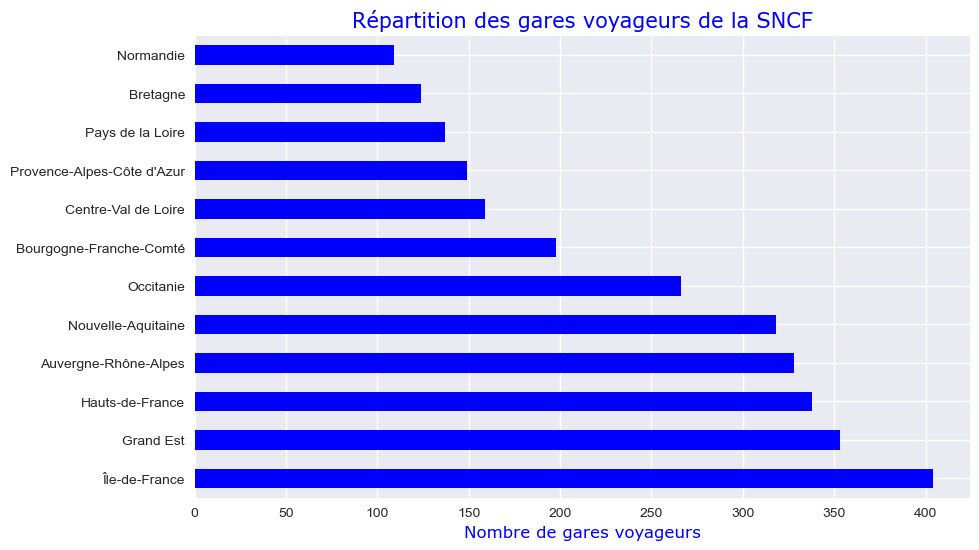

In [ ]:
plt.figure(figsize=(10, 6))
dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False).plot(kind = "barh", color = "blue", )
plt.title("Répartition des gares voyageurs de la SNCF",color =  "blue", fontfamily = "verdana", fontsize = 15)
plt.xlabel("Nombre de gares voyageurs", fontsize = 12, color = "blue", fontfamily = "verdana")
plt.ylabel("")

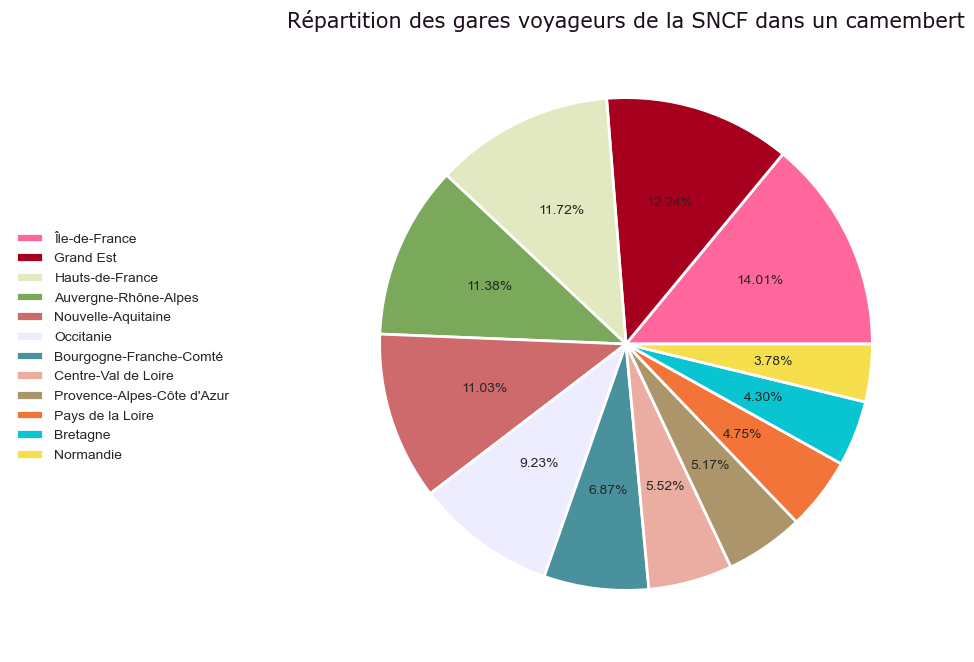

In [ ]:
plt.figure(figsize = (45, 8))
plt.pie(dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False), wedgeprops={"linewidth": 2, "edgecolor": "white"}, autopct='%1.2f%%', colors= ["#FF679D", "#A7001E", "#E2E9C0", "#7AA95C",  "#CE6A6B", "#EEEDFF", "#4A919E", "#EBACA2", "#AD956B", "#F27438", "#08C5D1", "#F5DF4D"])
plt.title("Répartition des gares voyageurs de la SNCF dans un camembert", color =  "#1E0F1C", fontfamily = "verdana", fontsize = 15)
plt.legend(list(dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False).index), loc = (-0.5, 0.3))

On récupère le fonds de carte avec limites des communes (à partir de `cartiflette` puis :
* on représente un `choropleth` des régions suivant le nombre de gares voyageurs qu'elle abrite ;
* on réalise une carte interractive de localisation des différentes gares par région.

In [ ]:
import cartiflette

In [ ]:
from cartiflette.download import get_vectorfile_ign
france = get_vectorfile_ign(
  level = "REGION",
  field = "metropole",
  source = "COG",
  provider="opendatarchives"
  )

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z


Downloading: : 244MiB [00:52, 4.88MiB/s] 


In [ ]:
france

,ID,NOM_M,NOM,INSEE_REG,geometry
0,REGION_FXX_0000000000001,ILE-DE-FRANCE,Île-de-France,11,"POLYGON ((689486.400 6885591.700, 689488.900 6..."
1,REGION_FXX_0000000000002,CENTRE-VAL DE LOIRE,Centre-Val de Loire,24,"POLYGON ((604790.400 6831645.800, 604797.700 6..."
2,REGION_FXX_0000000000003,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté,27,"POLYGON ((880572.700 6730278.000, 880518.100 6..."
3,REGION_FXX_0000000000004,NORMANDIE,Normandie,28,"MULTIPOLYGON (((367887.800 6849529.900, 367898..."
4,REGION_FXX_0000000000005,HAUTS-DE-FRANCE,Hauts-de-France,32,"POLYGON ((686066.000 6888650.700, 685949.700 6..."
5,REGION_FXX_0000000000006,GRAND EST,Grand Est,44,"POLYGON ((983336.700 6755086.100, 983449.700 6..."
6,REGION_FXX_0000000000007,PAYS DE LA LOIRE,Pays de la Loire,52,"MULTIPOLYGON (((293495.700 6674024.200, 293495..."
7,REGION_FXX_0000000000008,BRETAGNE,Bretagne,53,"MULTIPOLYGON (((174782.100 6757589.400, 174776..."
8,REGION_FXX_0000000000009,NOUVELLE-AQUITAINE,Nouvelle-Aquitaine,75,"MULTIPOLYGON (((374733.100 6507110.200, 374731..."
9,REGION_FXX_0000000000010,OCCITANIE,Occitanie,76,"MULTIPOLYGON (((449522.300 6253186.500, 449526..."


On soustrait d'abord la `Corse` des régions présentes.

In [ ]:
france.drop(france.loc[france["NOM"] == "Corse"].index, inplace = True)

c:\Users\guysa\anaconda3\lib\site-packages\geopandas\plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


<AxesSubplot:>

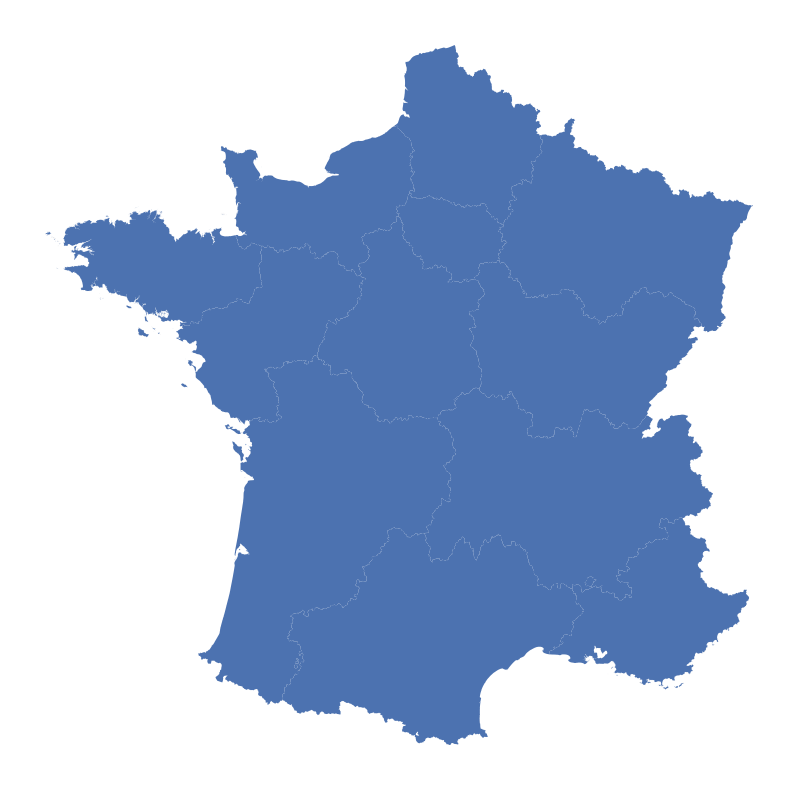

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
france.plot(axes = ax)
ax.set_axis_off()
ax

Complétons la base France avec le nombre de gares par région

In [ ]:
NbrGaresRegions = dataGaresV.groupby('region.nom').count()["code_gare"].sort_values(ascending = False)
NbrGaresRegions = NbrGaresRegions.reset_index()
NbrGaresRegions = NbrGaresRegions.rename(columns={"region.nom" : "NOM", "code_gare" : "Nombre de gares"})
NbrGaresRegions

,NOM,Nombre de gares
0,Île-de-France,404
1,Grand Est,353
2,Hauts-de-France,338
3,Auvergne-Rhône-Alpes,328
4,Nouvelle-Aquitaine,318
5,Occitanie,266
6,Bourgogne-Franche-Comté,198
7,Centre-Val de Loire,159
8,Provence-Alpes-Côte d'Azur,149
9,Pays de la Loire,137


In [ ]:
france_merge = france.merge(NbrGaresRegions, how = "left")

c:\Users\guysa\anaconda3\lib\site-packages\geopandas\plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


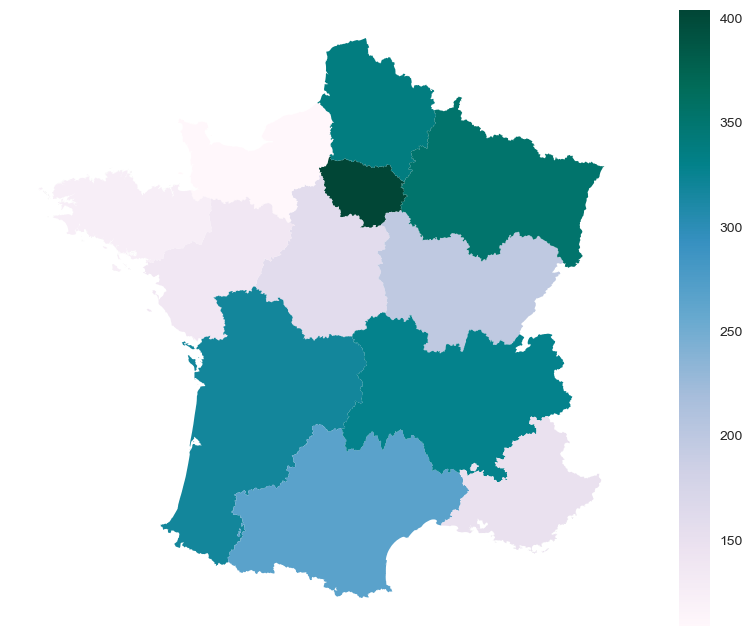

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
france_merge.plot(axes = ax, column = "Nombre de gares", legend=True, cmap = "PuBuGn")
ax.set_axis_off()

## Focus sur la fréquentation des stations voyageurs

Il nous reste à p

### Récupération des données de fréquentation des gares

Ce jeu de données représente la fréquentation annuelle de l'ensemble des 3000 gares voyageurs de 2015 à 2021.

Ces informations sont issues d’une part, des données de billetterie pour le trafic national et régional hors Ile-de-France et d’autre part, d’une extrapolation pour le trafic régional Ile-de-France à partir des comptages effectués tous les 3 à 4 ans et publiés par ailleurs en Open Data.

A noter, pour les années 2020 et 2021 peu de comptages ont été réalisés pour le trafic régional Ile-de-France en raison de la crise sanitaire. La fréquentation a été calculée en relatif par rapport aux évolutions des validations en gare observées depuis 2019.

***Informations du site open data de la [SNCF](https://ressources.data.sncf.com/explore/dataset/frequentation-gares/information/?disjunctive.nom_gare&disjunctive.code_postal&sort=nom_gare)***

In [ ]:
url_freq = "https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports" + "/json?limit=-1" + "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis" # url de l'API pour acccéder aux données
dataFreq = rq.get(url_freq)
dataFreq = dataFreq.json() 
dataFreq = pd.json_normalize(dataFreq)

In [ ]:
dataFreq = gdp.GeoDataFrame(dataFreq)

In [ ]:
dataFreq.head()

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
0,Ablon-sur-Seine,87545269,94480,b,1594567,1594567,660309,660309,1457253,1457253,1462108,1462108,1471462,1471462,1453063,1453063,1427319,1427319
1,Achères Grand Cormier,87386052,78100,b,209673,209673,126513,126513,221003,221003,228032,228032,235698,235698,238687,238687,241046,241046
2,Agen,87586008,47000,a,1184007,1480009,860964,1076205,1211323,1514154,1109199,1386499,1194455,1493068,1141620,1427026,1183150,1478938
3,Agonac,87595157,24460,c,4119,4119,3271,3271,2538,2538,1492,1492,1583,1583,1134,1134,1127,1127
4,Aigrefeuille le Thou,87485193,17290,c,32989,32989,24987,24987,31170,31170,18670,18670,14513,14513,266,266,0,0


In [ ]:
dataFreq.tail()

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
2965,Étalans,87718536,25580,c,50499,50499,48741,48741,48324,48324,43353,43353,48453,48453,47593,47593,45347,45347
2966,Étaples - Le Touquet,87317065,62630,b,396110,425925,268566,288781,388912,418185,354757,381459,377338,405740,358759,385762,389755,419092
2967,Étriché - Châteauneuf,87484154,49330,c,25656,25656,20760,20760,50986,50986,61562,61562,57633,57633,55988,55988,57751,57751
2968,Évreux Normandie,87387001,27000,a,787499,984374,693195,866494,1129373,1411717,1089292,1361615,1162631,1453288,1107913,1384892,1139477,1424346
2969,Évron,87478552,53600,b,120082,150103,93350,116687,162097,202621,181310,226638,192127,240159,187563,234454,181167,226459


Procédons d'abord à l'installation de `Cartiflette` afin d'accéder aux fonds de carte des cources officielles de l'IGN.

In [ ]:
!pip install --upgrade botocore==1.23.26 
!pip install --upgrade urllib3==1.22.0 
!pip install py7zr 
!pip install s3fs
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

Installon ensuite d'autres extensions nécessaires

In [ ]:
!pip install fiona shapely pyproj rtree 
!pip install contextily
!pip install pygeos

On récupère ensuite le fond de carte avec les bordures des différentes communes de l'Ile de France

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import cartiflette.s3

In [ ]:
cart_bordure_com = cartiflette.s3.download_vectorfile_url_all(level="COMMUNE", decoupage="departement", values="75", year=2022)

In [ ]:
cart_bordure_com

NameError: name 'cart_bordure_com' is not defined

In [18]:
url_freq = "https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports" + "/json?limit=-1" + "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis" # url de l'API pour acccéder aux données
dataFreq = rq.get(url_freq)
dataFreq = dataFreq.json() 
dataFreq = pd.json_normalize(dataFreq)

In [19]:
dataFreq = gdp.GeoDataFrame(dataFreq)

In [20]:
dataFreq.head()

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
0,Ablon-sur-Seine,87545269,94480,b,1594567,1594567,660309,660309,1457253,1457253,1462108,1462108,1471462,1471462,1453063,1453063,1427319,1427319
1,Achères Grand Cormier,87386052,78100,b,209673,209673,126513,126513,221003,221003,228032,228032,235698,235698,238687,238687,241046,241046
2,Agen,87586008,47000,a,1184007,1480009,860964,1076205,1211323,1514154,1109199,1386499,1194455,1493068,1141620,1427026,1183150,1478938
3,Agonac,87595157,24460,c,4119,4119,3271,3271,2538,2538,1492,1492,1583,1583,1134,1134,1127,1127
4,Aigrefeuille le Thou,87485193,17290,c,32989,32989,24987,24987,31170,31170,18670,18670,14513,14513,266,266,0,0


In [21]:
dataFreq.tail()

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
2965,Étalans,87718536,25580,c,50499,50499,48741,48741,48324,48324,43353,43353,48453,48453,47593,47593,45347,45347
2966,Étaples - Le Touquet,87317065,62630,b,396110,425925,268566,288781,388912,418185,354757,381459,377338,405740,358759,385762,389755,419092
2967,Étriché - Châteauneuf,87484154,49330,c,25656,25656,20760,20760,50986,50986,61562,61562,57633,57633,55988,55988,57751,57751
2968,Évreux Normandie,87387001,27000,a,787499,984374,693195,866494,1129373,1411717,1089292,1361615,1162631,1453288,1107913,1384892,1139477,1424346
2969,Évron,87478552,53600,b,120082,150103,93350,116687,162097,202621,181310,226638,192127,240159,187563,234454,181167,226459
